# 안녕하세요:)

## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.

* 우리는 공공 데이터를 활용해 버스 수요 관련 인사이트를 도출하여 버스 노선 또는 정류장이 더 필요한 구를 선정 하고자 합니다.

# 0. 튜토리얼 진행 하겠습니다.

## 지금부터 우리가 진행할 프로젝트에 대해 살펴 보겠습니다.
    
- 프로젝트를 진행하면서 무엇을 하고 있는지, 왜 하는지에 대해서 한번 생각 해보실 수 있는 시간이었으면 합니다.
    
- 정답이 있는 프로젝트가 아닙니다. 어떤 결과를 도출하셔도 좋습니다. 

- 모두가 끝까지 할 수 있도록 차근차근 가겠습니다.

#  1. 데이터 불러오기
## 모두 4개의 데이터가 주어집니다.
+ 버스 정류장 데이터 **

+ 유동 인구 데이터 **

+ 주민 등록 데이터 

+ 업종 등록 데이터

## 버스정류장 데이터** 와 유동인구 데이터** 를 메인으로 진행합니다.

+ 주민 등록 데이터와 업종 등록 데이터는 '추가 데이터'로 사용 여부 선택 가능합니다.


## 데이터 하나만 열어보고 갈게요 - 주민 등록 데이터

* rawdata 폴더에 있는 '1.3 seoul_people.csv'파일을 'seoul_people' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 '\t' 입니다
        * 'cp949' 인코더를 사용해 주세요

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# 서울시 구별 주민 등록 데이터 입니다
# https://data.seoul.go.kr/dataList/419/S/2/datasetView.do

import pandas as pd

seoul_people = pd.read_csv('1.3 seoul_people.csv',sep="\t", encoding = 'cp949')

In [3]:
seoul_people.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2022.1/4,합계,4451444,9732617,4716704,5015913,9506778,4613910,4892868,225839,102794,123045,2.14,1628980
3,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
4,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742


In [4]:
seoul_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        28 non-null     object
 1   자치구       28 non-null     object
 2   세대        28 non-null     object
 3   인구        28 non-null     object
 4   인구.1      28 non-null     object
 5   인구.2      28 non-null     object
 6   인구.3      28 non-null     object
 7   인구.4      28 non-null     object
 8   인구.5      28 non-null     object
 9   인구.6      28 non-null     object
 10  인구.7      28 non-null     object
 11  인구.8      28 non-null     object
 12  세대당인구     28 non-null     object
 13  65세이상고령자  28 non-null     object
dtypes: object(14)
memory usage: 3.2+ KB


In [5]:
seoul_people.head(30)

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2022.1/4,합계,4451444,9732617,4716704,5015913,9506778,4613910,4892868,225839,102794,123045,2.14,1628980
3,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
4,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
5,2022.1/4,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2,39461
6,2022.1/4,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
7,2022.1/4,광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604
8,2022.1/4,동대문구,169695,352592,172318,180274,337982,166823,171159,14610,5495,9115,1.99,62963
9,2022.1/4,중랑구,187693,393600,193623,199977,389043,191835,197208,4557,1788,2769,2.07,72851


# 2. 데이터 확인하기
## 데이터의 상태를 정확히 파악한 뒤, 분석하기 용이한 형태로 전처리 해봅시다.
+ KeyPoint : 데이터를 확인하고 잘못된 자료들을 수정할 수 있다.
  * 데이터 확인
  * 관측치들의 패턴 탐색
  * 잘못된 자료들을 탐색

In [6]:
seoul_people.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2022.1/4,합계,4451444,9732617,4716704,5015913,9506778,4613910,4892868,225839,102794,123045,2.14,1628980
3,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
4,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742


In [8]:
seoul_people = pd.read_csv('1.3 seoul_people.csv', sep="\t", encoding = "cp949", header = 2)

In [9]:
seoul_people

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2022.1/4,합계,4451444,9732617,4716704,5015913,9506778,4613910,4892868,225839,102794,123045,2.14,1628980
1,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
2,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
3,2022.1/4,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2.00,39461
4,2022.1/4,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
5,2022.1/4,광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604
6,2022.1/4,동대문구,169695,352592,172318,180274,337982,166823,171159,14610,5495,9115,1.99,62963
7,2022.1/4,중랑구,187693,393600,193623,199977,389043,191835,197208,4557,1788,2769,2.07,72851
8,2022.1/4,성북구,197296,442680,212277,230403,433150,208691,224459,9530,3586,5944,2.20,75719
9,2022.1/4,강북구,144725,300824,145934,154890,297384,144643,152741,3440,1291,2149,2.05,64961


## 답이 정해져 있는 프로젝트가 아닙니다 

+ 저는 여기서 인구 합계와 남자, 여자 수만 가져가는데요, 여기서 다른 포인트를 잡아보는 것도 색다른 분석이 될 수 있습니다

+ 65세 이상 인구의 이동시 주로 이용하는 교통 수단이 뭘까요?

+ '세대당 인구'나 '등록 외국인의 수'에서 얻어낼 수 있는 인사이트가 있을까요?

In [10]:
seoul_people = seoul_people[['자치구','남자','여자','계']]
seoul_people = seoul_people.drop(0)
seoul_people

,자치구,남자,여자,계
1,종로구,74018,79666,153684
2,중구,63869,67581,131450
3,용산구,114571,121947,236518
4,성동구,141662,149947,291609
5,광진구,169525,183585,353110
6,동대문구,172318,180274,352592
7,중랑구,193623,199977,393600
8,성북구,212277,230403,442680
9,강북구,145934,154890,300824
10,도봉구,154440,163660,318100


# 3. 데이터 분석하기
## 최적의 모델을 만들기위해 데이터를 입체적으로 바라보는 시도는 중요합니다.
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 관측치들의 패턴 탐색
  * 잘못된 자료들을 탐색
  * 변수들간의 관계 파악

## 우리는 시각화를 통해서 데이터를 분석할 예정입니다.
+ 데이터 시각화(data visualization)는 데이터 분석 결과를 쉽게 이해할 수 있도록 시각적으로 표현하고 전달되는 과정을 말한다. 데이터 시각화의 목적은 도표(graph)라는 수단을 통해 정보를 명확하고 효과적으로 전달하는 것이다.(위키백과)

+ 튜토리얼에서는 따로 그리는 시간을 가지진 않습니다만 프로젝트 진행시엔 많은 시도 부탁드립니다.

In [11]:
# 시각화, 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### Seaborn을 활용한 데이터 시각화
#### Seaborn 라이브러리는 데이터를 직관적으로 볼 수 있도록 다양한 지원을 해주고 있습니다.
#### 여기서는 Seaborn이 제공하는 통계차트 중 대표적인 몇 가지를 활용해보고자 합니다.
[참고] 공식 Document
* Seaborn(https://seaborn.pydata.org/api.html)
* Seaborn.CountChart(https://seaborn.pydata.org/generated/seaborn.countplot.html)
* Seaborn.Distplot(https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot) : 히스토그램 + 커널밀도
* Seaborn.Boxplot(https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)
* Seaborn.Heatmap(https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)
* Seaborn.Pairplot(https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) : 조합별 히스토그램 + 산점도

In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_people["남자비율"] = seoul_people['남자'] / seoul_people["계"]

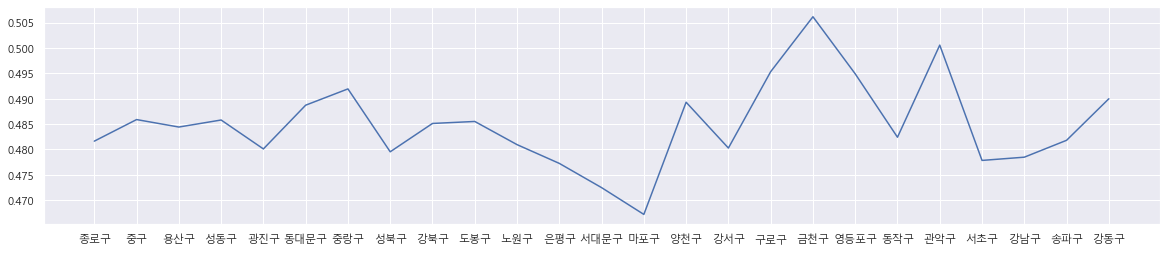

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,4))
plt.plot('자치구', '남자비율', data = seoul_people)


<AxesSubplot:xlabel='자치구', ylabel='남자비율'>

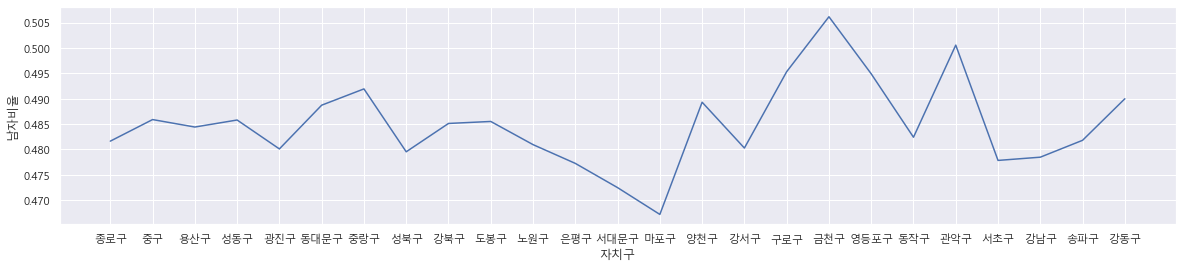

In [14]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,4
sns.lineplot(data = seoul_people, x= '자치구', y='남자비율')

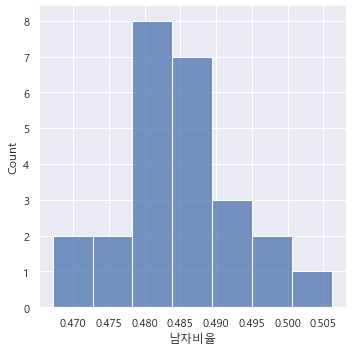

In [15]:
sns.displot(seoul_people['남자비율'])

### 상관관계 분석(Pandas/Seaborn)
#### 상관관계 분석은 왜 하는것일까요? 변수 간 관계를 들여다보기 위해서!
#### 막연하게 상관관계는 높으면 좋을 것 같습니다. 하지만 AI모델링 또는 통계분석에서 꼭 좋은 것은 아닙니다. 
+ 가령 살아온 날수와 식사를 한 끼니 수는 강한 상관관계를 가질 것입니다. 그러나 조금만 다르게 보면 둘은 같은 이야기를 하는 것이라고 할 수 있습니다.

In [16]:
# 아래에 실습코드를 작성하고 상관계수를 확인합니다.
import scipy.stats as spst
spst.pearsonr(seoul_people['남자'],seoul_people['계'])

(0.9985458891660371, 1.1092314895194855e-30)

In [17]:
# 아래에 실습코드를 작성하고 상관계수를 확인합니다.
seoul_people.corr()

,남자,여자,계,남자비율
남자,1.000000,0.994596,0.998546,-0.063461
여자,0.994596,1.000000,0.998747,-0.163345
계,0.998546,0.998747,1.000000,-0.115413
남자비율,-0.063461,-0.163345,-0.115413,1.000000


In [18]:
# 위 차트들을 통해 알게된 사실을 정리해봅시다.

# 1. 송파구 - 가장 많은 인구,  중구 - 가장 적은 인구

# 2. 

# 3. 

### 인사이트 도출
* 데이터 분석 결과를 토대로 인사이트를 정리해보세요.

In [19]:
#### [종합문제] 인사이트 도출
# 1. (현상)                               -> (인사이트)
# 2. (현상)                               -> (인사이트)
# 3. (현상)                               -> (인사이트)